Anzahl Beobachtungen: 1258
Zeitraum: 2020-01-02 bis 2024-12-31


Price,Kurs
Date,
2020-01-02,53.950001
2020-01-03,53.759998
2020-01-06,54.040001
2020-01-07,54.160000
2020-01-08,54.130001


Price,Kurs
Date,
2024-12-24,171.410004
2024-12-26,171.679993
2024-12-27,168.960007
2024-12-30,166.910004
2024-12-31,166.639999


Deskriptive Statistik zum Schlusskurs (Close):


count    1258.000000
mean       91.429555
std        32.392387
min        39.799999
25%        66.557499
50%        85.405003
75%       112.202499
max       192.429993
Name: Kurs, dtype: float64

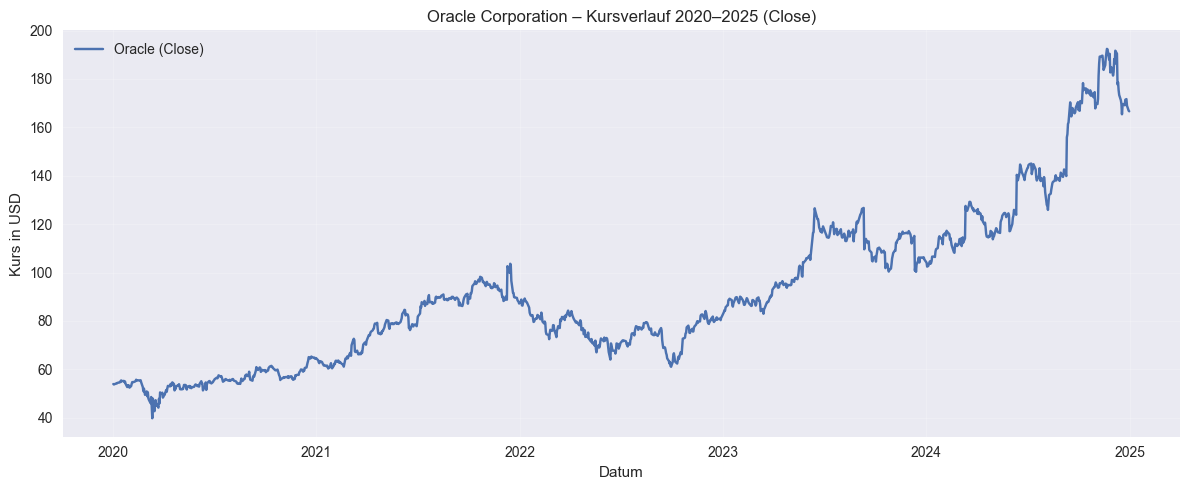

Durchschnittliche tägliche Rendite: 0.1108%
Tägliche Volatilität (Standardabweichung): 2.0662%
Geschätzte jährliche Rendite (annualisiert): 32.20%
Geschätzte jährliche Volatilität (annualisiert): 32.80%


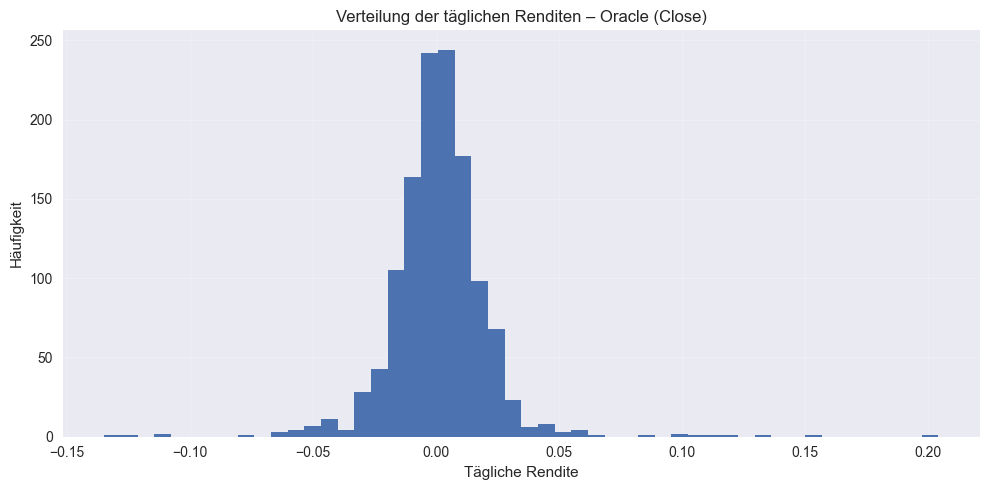

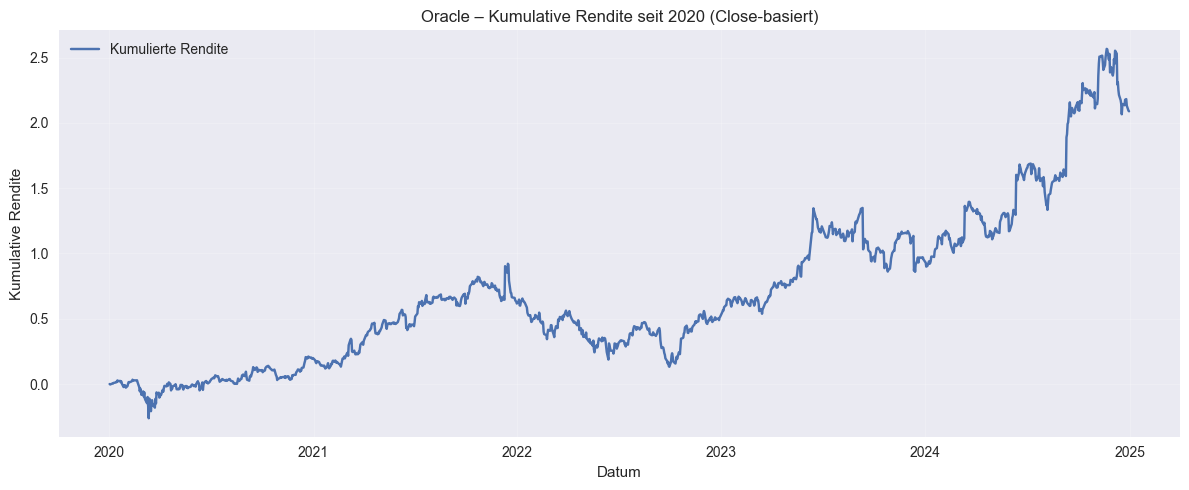

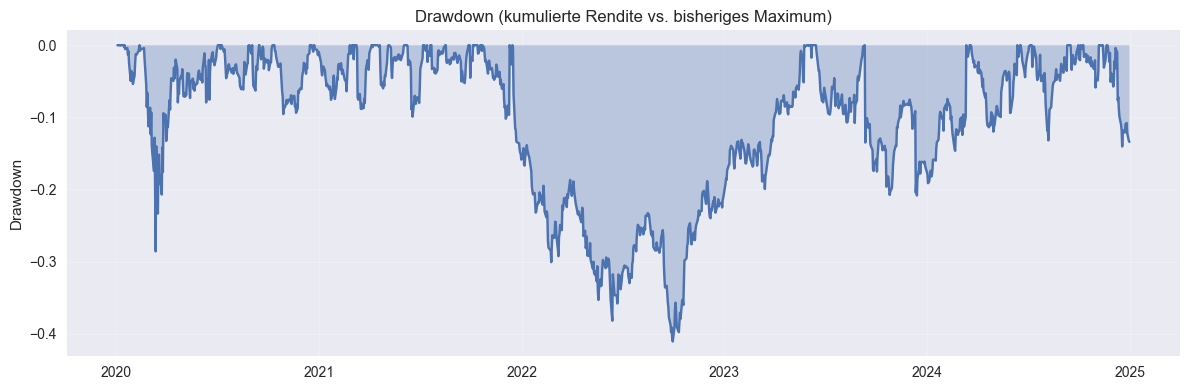

Max Drawdown: -41.08% am 2022-09-30


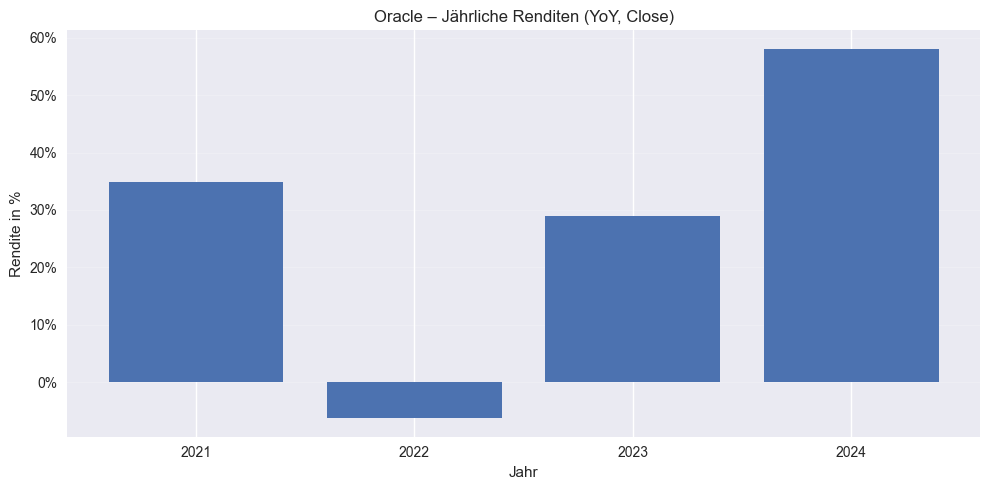

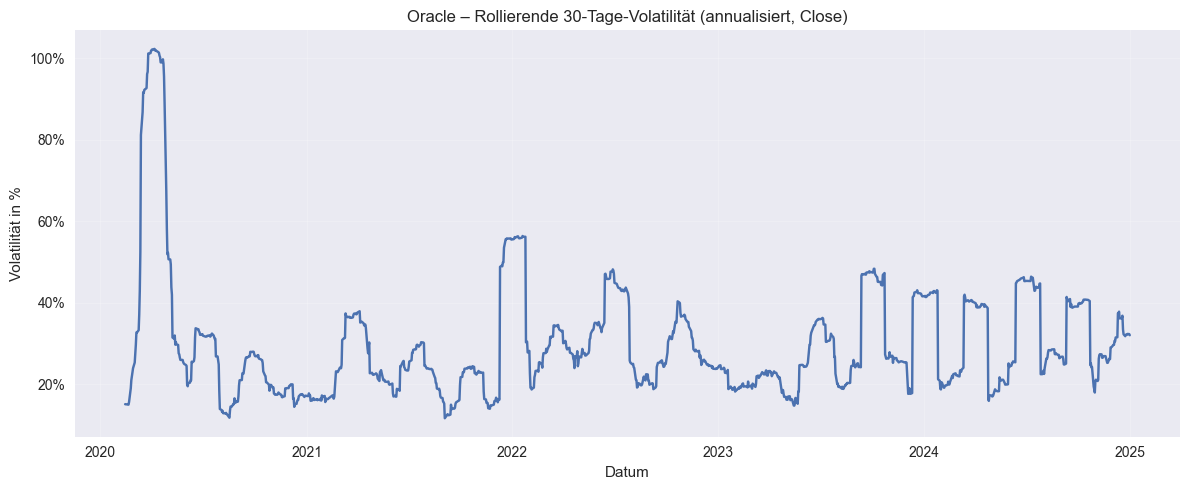

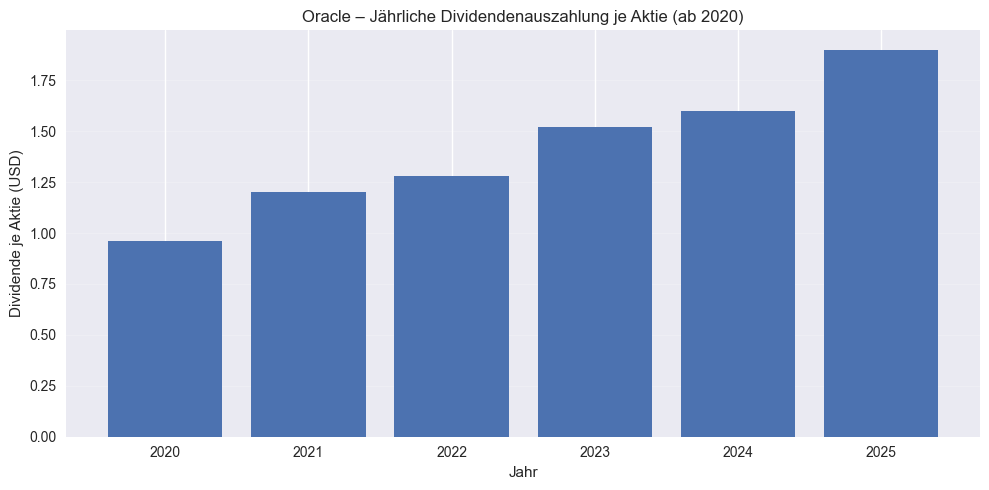

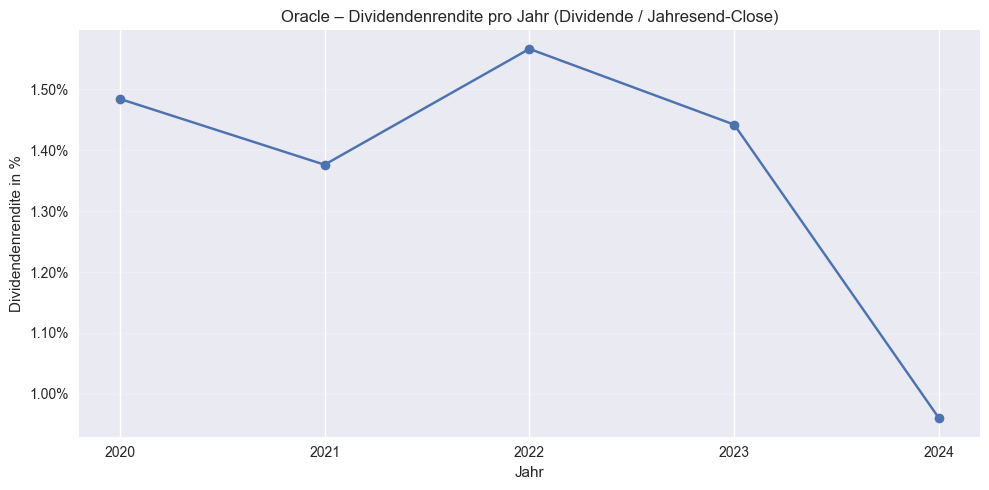


--- Jahresübersicht (ab 2020) ---
      Jahresrendite (YoY)  Volatilität (ann., pro Jahr)  Dividende je Aktie (Jahr)  Dividendenrendite (Jahr)
Date                                                                                                        
2020                  NaN                      0.405899                       0.96                  0.014840
2021             0.348122                      0.292171                       1.20                  0.013760
2022            -0.062722                      0.305423                       1.28                  0.015659
2023             0.289821                      0.302112                       1.52                  0.014417
2024             0.580575                      0.322762                       1.60                  0.009602
2025                  NaN                           NaN                       1.90                       NaN


In [1]:
# -----------------------------
# 1) Imports
# -----------------------------
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('seaborn-v0_8')

# -----------------------------
# 2) Daten laden (Close-only)
# -----------------------------
TICKER = "ORCL"
START = "2020-01-01"
END   = "2025-01-01"

raw = yf.download(
    TICKER,
    start=START,
    end=END,
    auto_adjust=False,
    progress=False
)

# MultiIndex abfangen
if isinstance(raw.columns, pd.MultiIndex): # falls Yahoo Finance mehrere Ebenen liefert
    raw.columns = raw.columns.get_level_values(0) # nur die erste Ebene behalten

data = raw[['Close']].dropna().rename(columns={'Close': 'Kurs'}).copy() # Close in Kurs umbenennen

print("Anzahl Beobachtungen:", len(data)) # Ausgabe der Anzahl der Beobachtungen
print("Zeitraum:", data.index.min().date(), "bis", data.index.max().date()) # Ausgabe des Zeitraums
display(data.head()) # Anzeigen der ersten fünf Zeilen des DataFrames
display(data.tail()) # Anzeigen der letzten fünf Zeilen des DataFrame

# -----------------------------
# 3) Deskriptive Statistik
# -----------------------------
stats = data['Kurs'].describe() # Berechnung der deskriptiven Statistik für die Kursdaten
print("Deskriptive Statistik zum Schlusskurs (Close):") # Ausgabe der deskriptiven Statistik
display(stats)

# -----------------------------
# 4) Kursverlauf
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Kurs'], label='Oracle (Close)')
plt.title('Oracle Corporation – Kursverlauf 2020–2025 (Close)')
plt.xlabel('Datum')
plt.ylabel('Kurs in USD')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# -----------------------------
# 5) Tägliche Rendite + Kennzahlen
# -----------------------------
data['Rendite'] = data['Kurs'].pct_change()
returns = data['Rendite'].dropna()

mean_daily = returns.mean()
vol_daily  = returns.std()

print(f"Durchschnittliche tägliche Rendite: {mean_daily:.4%}")
print(f"Tägliche Volatilität (Standardabweichung): {vol_daily:.4%}")

annual_return_est = (1 + mean_daily) ** 252 - 1
annual_vol_est    = vol_daily * np.sqrt(252)

print(f"Geschätzte jährliche Rendite (annualisiert): {annual_return_est:.2%}")
print(f"Geschätzte jährliche Volatilität (annualisiert): {annual_vol_est:.2%}")

# -----------------------------
# 6) Histogramm der täglichen Renditen
# -----------------------------
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50)
plt.title('Verteilung der täglichen Renditen – Oracle (Close)')
plt.xlabel('Tägliche Rendite')
plt.ylabel('Häufigkeit')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# -----------------------------
# 7) Kumulative Rendite
# -----------------------------
data['Kumulierte_Rendite'] = (1 + data['Rendite'].fillna(0)).cumprod() - 1

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Kumulierte_Rendite'], label='Kumulierte Rendite')
plt.title('Oracle – Kumulative Rendite seit 2020 (Close-basiert)')
plt.xlabel('Datum')
plt.ylabel('Kumulative Rendite')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# -----------------------------
# 8) Drawdown (auf Basis kumulativer Rendite)
# -----------------------------
cum = (1 + returns).cumprod()
running_max = cum.cummax()
drawdown = cum / running_max - 1

plt.figure(figsize=(12, 4))
plt.plot(cum.index, drawdown)
plt.fill_between(cum.index, drawdown, 0, where=drawdown < 0, alpha=0.3)
plt.title('Drawdown (kumulierte Rendite vs. bisheriges Maximum)')
plt.ylabel('Drawdown')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

print(f"Max Drawdown: {drawdown.min():.2%} am {drawdown.idxmin().date()}")

# =========================================================
#  Jahresrenditen (YoY) – Balkendiagramm
# =========================================================
year_end_close = data['Kurs'].resample('YE').last()
annual_returns = year_end_close.pct_change().dropna()
annual_returns.index = annual_returns.index.year

plt.figure(figsize=(10, 5))
plt.bar(annual_returns.index.astype(str), annual_returns.values * 100)
plt.title('Oracle – Jährliche Renditen (YoY, Close)')
plt.xlabel('Jahr')
plt.ylabel('Rendite in %')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True, axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

# =========================================================
#  Rollierende 30-Tage-Volatilität (annualisiert)
# =========================================================
vol_30d_ann = returns.rolling(30).std() * np.sqrt(252)

plt.figure(figsize=(12, 5))
plt.plot(vol_30d_ann.index, vol_30d_ann.values * 100)
plt.title('Oracle – Rollierende 30-Tage-Volatilität (annualisiert, Close)')
plt.xlabel('Datum')
plt.ylabel('Volatilität in %')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# =========================================================
# Dividenden ab 2020 + Dividendenrendite pro Jahr
# =========================================================
orcl = yf.Ticker(TICKER)
dividends = orcl.dividends.loc["2020-01-01":]

# jährliche Dividendensumme
annual_dividends = dividends.resample("YE").sum().dropna()
annual_dividends.index = annual_dividends.index.year

plt.figure(figsize=(10, 5))
plt.bar(annual_dividends.index.astype(str), annual_dividends.values)
plt.title("Oracle – Jährliche Dividendenauszahlung je Aktie (ab 2020)")
plt.xlabel("Jahr")
plt.ylabel("Dividende je Aktie (USD)")
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

# Dividendenrendite pro Jahr: Dividenden / Year-End Close (Close-basiert)
year_end_close_year = year_end_close.copy()
year_end_close_year.index = year_end_close_year.index.year

dividend_yield = (annual_dividends / year_end_close_year).dropna()

plt.figure(figsize=(10, 5))
plt.plot(dividend_yield.index.astype(str), dividend_yield.values * 100, marker="o")
plt.title("Oracle – Dividendenrendite pro Jahr (Dividende / Jahresend-Close)")
plt.xlabel("Jahr")
plt.ylabel("Dividendenrendite in %")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
#  Präsentationsfolie
# ---------------------------------------------------------
overview = pd.DataFrame({
    "Jahresrendite (YoY)": annual_returns,
    "Volatilität (ann., pro Jahr)": (returns.resample("YE").std() * np.sqrt(252)).dropna().set_axis(
        (returns.resample("YE").std() * np.sqrt(252)).dropna().index.year
    ),
    "Dividende je Aktie (Jahr)": annual_dividends,
    "Dividendenrendite (Jahr)": dividend_yield
}).sort_index()

print("\n--- Jahresübersicht (ab 2020) ---")
print(overview.to_string())
